# TP 6 -  Sampling random numbers


<h4 align="right"> Hicham Janati </h4>


In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

### 


# 1- Pseudo-random generators

The generator RANDU is a linear pseudo-random generator defined by the sequence of division rests on all integers of a 32-bit system:
$$ x_{n+1} = (2^{16} + 3) x_n \text{ mod } [2^{31}]$$
so that the sequence $$u_{n} = \frac{x_n}{2^{31}}$$ follows a uniform distribution over [0, 1]. The purpose of this exercise is to show why RANDU is considered one of the worst pseudo-random generators of all time.

#### Question 1. 
Generate 10000 samples using RANDU and plot $u_{n+2}$ as a function of $u_{n}$ for all $u_{n+1} \in [0.5, 0.51]$. What do you observe ?

In [2]:
def randu(N, seed=1):
    g2me = 2**31
    xica = 2**16 + 3
    LX,LU=[],[]
    LX.append(seed)
    LU.append(seed/g2me)
    for i in range(N):
        LX.append(((xica)*LX[i])%(g2me))
        LU.append(LX[i+1]/g2me)
    return LU

In [55]:
LUsamples = randu(400000)

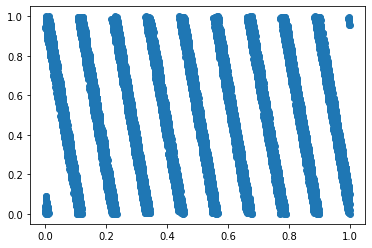

In [56]:
absc,ordo,yfil = [],[],[]
for i in range(len(LUsamples)-2):
    if (0.49 < LUsamples[i+1]) and (LUsamples[i+1] < 0.52):
        absc.append(LUsamples[i])
        ordo.append(LUsamples[i+2])
        yfil.append(LUsamples[i+1])
plt.scatter(absc,ordo)
plt.show()

We observe a pattern in a distribution that is supposed to be RANDOM

In [57]:
#Another way to do it
N = 100000
U = randu(N)
x,y,z = U[:-2], U[1:-1], U[:2]

#This next line has to be checked, it's the core of the problem :
#filtre = (y<0.52)*(y>0.49)
"""plt.figure()
plt.scatter(x[filtre], z[filtre])
plt.show()"""

'plt.figure()\nplt.scatter(x[filtre], z[filtre])\nplt.show()'

In [58]:
#How to code properly a pseudo-random generator : use a function that returns a function and that will update its seed itself. 

#### Question 2. 
 Visualize this phenomenon using a 3 dimensions plot

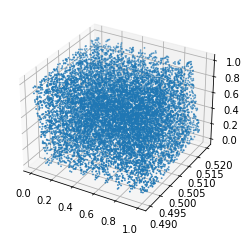

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(absc, yfil, ordo, s=0.8)

#### Question 3
Prove the observed behavior i.e $(u_n, u_{n+1}, u_{n+2})$ belong to specific hyperplanes in $[0, 1]^3.$

PROVE IT PROVE IT PROVE IT PROVE IT PROVE IT

#### Question 4
An easy way to write an integer in base 2 is:

In [63]:
x = 14
x_bin = int("{0:b}".format(x))
x_bin

1110

Show that the last bits (the ones with low weight) of a RANDU sequence have a very small cycling period.

The pseudo-random generator used in Numpy (and most programming languages) is based on the Mersenne Twister algorithm which, loosely speaking is based on a buffer of size m i.e when given a seed $x_0$, the first generated output would be $x_{m+1}$. This makes it enjoy better statistical properties. 

# 2 - Sampling: inversing the CDF and rejection sampling
1. Assume we now have a (reliable) pseudo-random generator RAND of a uniform distribution in [0, 1]. How can we generate samples following a different distribution with known CDF F using uniform samples from RAND using the <a href=https://en.wikipedia.org/wiki/Inverse_transform_sampling> inversion theorem </a>?

2. Applying this strategy to the exponential distribution, implement a generator of samples following the exponential 
distribution of parameter $\alpha$.

In [69]:
#And then we could do the same with geometrical, but below is the code for exponential. 

In [67]:
def exponential(n,lambda_,seed=None):
    rng = np.random.RandomState(seed)
    U = rng.rand(n)
    X = -np.log(U) / lambda_
    return X

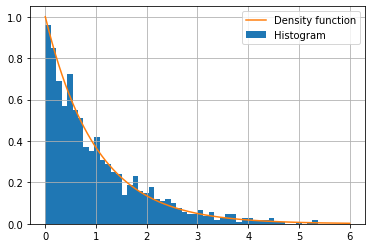

In [68]:
X = exponential(1000,1,seed=42)

grid = np.linspace(0.,6,1000)
exp_density = np.exp(-grid)
plt.figure()
plt.hist(X,bins=50, density = True, label = "Histogram")
plt.plot(grid, exp_density, label="Density function")
plt.grid()
plt.legend()
plt.show()

3. Consider a random variable X following an exponential distribution with parameter $\alpha$. Determine the distribution of the integer part of X i.e the distribution of floor(X). Deduce a random generator for the geometric distribution.


4. Apply this strategy to write a pseudo-random generator of samples following the Laplace distribution with density:
$$ p(x) = \frac{1}{2}\exp(-|x|)$$

5. Assume we want to sample from a distribution with density f(x). The <a href=https://en.wikipedia.org/wiki/Rejection_sampling> rejection sampling</a> method generates samples so as "to fill the area" below the graph of the density function. To do so, one must have a method to sample from an area "surrounding" the density function graph and accept the sample if the point is below the graph, reject it otherwise.

Let f be the centered and normalized Gaussian density function. Find the smallest constant M such that $f(x) \leq Mg(x)$. Using $Mg(x)$ as a surrogate function for the Gaussian density, write a generator of Gaussian samples based the accept-reject method.

6. Can we do the opposite ? Generate Laplace samples using a Gaussian generator via accept-reject ?

## 3 - Sampling: Box-Muller algorithm

Consider the following algorithm: 
1. Sample two random variables $U_1, U_2 \sim U[0, 1]$.
2. Define $X = U_1\sqrt{-2\log(U_1)}\sin(2\pi U_2)$ and $Y = U_2\sqrt{-2\log(U_1)}\cos(2\pi U_2)$.


##### Question 1.
Show that $X, Y$ are independent and follow $\mathcal{N}(0, 1)$.

##### Question 2
Draw Gaussian samples from the box-muller sampler and visualize its performance. Make sure your sampler is vectorized: generate n samples without any loops.

###### Question 3.


An improved version of the Box-muller algorithm is given by:
1. Sample two random variables $U_1, U_2 \sim U[-1, 1]$ until $\|(U_1, U_2)\|^2 \leq 1$.
2. Define $X = U_1\sqrt{-2\log(S)/S}$ and $Y = U_2\sqrt{-2\log(S)/S}$ where $S = \|(U_1, U_2)\|^2.$

Compare both sampling methods. Why could the Box-muller be better a priori ?